### Import Libraries

In [139]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import warnings
warnings.filterwarnings('ignore')

### Read Dataset

In [140]:
train = pd.read_csv('train.csv')
test = pd.read_csv('test.csv')

In [141]:
train.head()

,Interview Id,Candidate Id,Interviewer Id,Profile,S.L.R.C,S.L.R.I,A.T.T,L.M.I,L.M.C,S.R,...,L.A.I,Q.A,P.E.I,P.E.C,COMPLIANCE Ratio,Interview duration,Interviewer Intro,Candidate into,Opp to ask,Status
0,6.913030e+11,2.655774e+09,194,Developer,0.98,0.02,53,88,93,32,...,15,6,Neutral,Neutral,98,37,No,Yes,Yes,Consider
1,9.214326e+11,7.123846e+08,234,Sales,0.67,0.33,51,53,44,36,...,15,4,Neutral,Negative,54,33,No,No,Yes,Consider
2,4.718839e+10,8.445533e+08,267,Program Manager,0.81,0.19,60,77,75,54,...,7,3,Positive,Positive,31,58,No,Yes,No,Consider
3,9.943741e+11,6.511106e+09,199,Marketing,0.69,0.31,93,42,103,49,...,10,7,Positive,Negative,24,35,No,Yes,No,Consider
4,3.509007e+11,3.487001e+09,221,QA Automation,0.57,0.43,44,44,119,66,...,7,3,Negative,Positive,73,60,Yes,Yes,No,Consider


In [142]:
train['Profile'].value_counts()

Developer          618
Account Manager    598
Sales              585
QA Manual          585
QA Automation      577
Marketing          574
Product Manager    571
Program Manager    568
Data Scientist     566
HR                 558
Name: Profile, dtype: int64

In [143]:
train.shape

(5800, 27)

In [144]:
test.head()

,Interview Id,Candidate Id,Interviewer Id,Profile,S.L.R.C,S.L.R.I,A.T.T,L.M.I,L.M.C,S.R,...,L.A.C,L.A.I,Q.A,P.E.I,P.E.C,COMPLIANCE Ratio,Interview duration,Interviewer Intro,Candidate into,Opp to ask
0,702127796635,2.381365e+09,229,Product Manager,0.52,0.48,103,53,77,30,...,5,19.0,4.0,Positive,Negative,24.0,49,Yes,Yes,Yes
1,613490569071,8.428514e+08,194,Product Manager,0.87,0.13,54,57,57,68,...,1,9.0,7.0,Positive,Neutral,99.0,24,No,Yes,Yes
2,759998772623,7.681665e+09,266,QA Automation,0.60,0.40,50,117,93,36,...,7,15.0,3.0,Negative,Positive,16.0,16,Yes,No,Yes
3,391760082113,6.627808e+09,256,HR,0.52,0.48,102,114,66,31,...,10,4.0,6.0,Negative,Neutral,66.0,40,No,No,Yes
4,941599210196,1.148634e+09,267,HR,0.59,0.41,96,73,115,23,...,10,4.0,6.0,Positive,Positive,47.0,38,No,Yes,Yes


In [145]:
test.shape

(1200, 26)

In [146]:
train['Status'].value_counts()    # Our target variable

Consider        2311
May Consider    1890
Not Consider    1595
Name: Status, dtype: int64

In [147]:
train.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5800 entries, 0 to 5799
Data columns (total 27 columns):
 #   Column              Non-Null Count  Dtype  
---  ------              --------------  -----  
 0   Interview Id        5800 non-null   float64
 1   Candidate Id        5800 non-null   float64
 2   Interviewer Id      5800 non-null   int64  
 3   Profile             5800 non-null   object 
 4   S.L.R.C             5800 non-null   float64
 5   S.L.R.I             5800 non-null   float64
 6   A.T.T               5800 non-null   int64  
 7   L.M.I               5800 non-null   int64  
 8   L.M.C               5800 non-null   int64  
 9   S.R                 5800 non-null   int64  
 10  L.J.T.C             5800 non-null   int64  
 11  L.J.T.I             5800 non-null   int64  
 12  N.I.C               5800 non-null   int64  
 13  N.I.I               5800 non-null   int64  
 14  S.P.I               5800 non-null   int64  
 15  S.P.C               5800 non-null   int64  
 16  L.A.C 

### Data Preprocessing for train and test

In [148]:
train.isnull().sum()

Interview Id          0
Candidate Id          0
Interviewer Id        0
Profile               0
S.L.R.C               0
S.L.R.I               0
A.T.T                 0
L.M.I                 0
L.M.C                 0
S.R                   0
L.J.T.C               0
L.J.T.I               0
N.I.C                 0
N.I.I                 0
S.P.I                 0
S.P.C                 0
L.A.C                 0
L.A.I                 0
Q.A                   0
P.E.I                 1
P.E.C                 3
COMPLIANCE Ratio      0
Interview duration    0
Interviewer Intro     1
Candidate into        0
Opp to ask            1
Status                4
dtype: int64

In [149]:
train['P.E.I'].value_counts()

Negative    2004
Neutral     1900
Positive    1895
Name: P.E.I, dtype: int64

In [150]:
train['P.E.I'] = train['P.E.I'].fillna('Negative')    # filling null values with mode

In [151]:
train['P.E.C'].value_counts()

Neutral     1971
Positive    1941
Negative    1885
Name: P.E.C, dtype: int64

In [152]:
train['P.E.C'] = train['P.E.C'].fillna('Neutral')

In [153]:
train['Interviewer Intro'].value_counts()

No     2911
Yes    2888
Name: Interviewer Intro, dtype: int64

In [154]:
train['Interviewer Intro'] = train['Interviewer Intro'].fillna('No')

In [155]:
train['Opp to ask'].value_counts()

Yes    2955
No     2844
Name: Opp to ask, dtype: int64

In [156]:
train['Opp to ask'] = train['Opp to ask'].fillna('Yes')

In [157]:
train['Status'].value_counts()   

Consider        2311
May Consider    1890
Not Consider    1595
Name: Status, dtype: int64

In [158]:
# Dropping 4 missing values in target variable
train.dropna(inplace=True)

In [159]:
train.isnull().sum()

Interview Id          0
Candidate Id          0
Interviewer Id        0
Profile               0
S.L.R.C               0
S.L.R.I               0
A.T.T                 0
L.M.I                 0
L.M.C                 0
S.R                   0
L.J.T.C               0
L.J.T.I               0
N.I.C                 0
N.I.I                 0
S.P.I                 0
S.P.C                 0
L.A.C                 0
L.A.I                 0
Q.A                   0
P.E.I                 0
P.E.C                 0
COMPLIANCE Ratio      0
Interview duration    0
Interviewer Intro     0
Candidate into        0
Opp to ask            0
Status                0
dtype: int64

### For Test

In [160]:
test.isnull().sum()

Interview Id          0
Candidate Id          0
Interviewer Id        0
Profile               0
S.L.R.C               0
S.L.R.I               1
A.T.T                 0
L.M.I                 0
L.M.C                 0
S.R                   0
L.J.T.C               1
L.J.T.I               0
N.I.C                 0
N.I.I                 0
S.P.I                 2
S.P.C                 0
L.A.C                 0
L.A.I                 1
Q.A                   1
P.E.I                 2
P.E.C                 2
COMPLIANCE Ratio      1
Interview duration    0
Interviewer Intro     2
Candidate into        0
Opp to ask            0
dtype: int64

In [161]:
test['S.L.R.I'].value_counts()

0.20    32
0.44    30
0.19    30
0.25    30
0.50    29
0.32    29
0.40    29
0.22    29
0.03    28
0.49    28
0.45    28
0.38    28
0.31    28
0.10    27
0.36    26
0.14    26
0.05    26
0.43    26
0.41    26
0.46    25
0.47    25
0.16    25
0.33    25
0.07    25
0.34    24
0.21    24
0.37    24
0.28    23
0.48    23
0.18    23
0.13    23
0.26    23
0.09    23
0.08    23
0.24    22
0.11    22
0.35    22
0.42    22
0.23    21
0.02    20
0.17    20
0.01    19
0.29    19
0.04    18
0.27    18
0.15    18
0.30    17
0.06    17
0.12    17
0.39    14
Name: S.L.R.I, dtype: int64

In [162]:
test['S.L.R.I'] = test['S.L.R.I'].fillna(0.20)    # filling this by mode

In [163]:
test['L.J.T.C'].value_counts()

142.0    11
267.0    10
118.0     9
71.0      9
251.0     8
         ..
5.0       1
271.0     1
186.0     1
275.0     1
124.0     1
Name: L.J.T.C, Length: 294, dtype: int64

In [164]:
test['S.P.I'].value_counts()

31.0    27
41.0    24
38.0    24
88.0    24
69.0    22
        ..
49.0    11
67.0    10
85.0    10
44.0    10
48.0    10
Name: S.P.I, Length: 71, dtype: int64

In [165]:
test['COMPLIANCE Ratio'].value_counts()

43.0    23
76.0    22
66.0    21
13.0    19
98.0    18
        ..
61.0     7
31.0     7
95.0     7
55.0     6
27.0     6
Name: COMPLIANCE Ratio, Length: 101, dtype: int64

In [166]:
for i in test[['S.P.I','L.J.T.C','COMPLIANCE Ratio']]:
    test[i] = test[i].fillna(test[i].mean())

In [167]:
test['L.A.I'].value_counts()

19.0    77
5.0     69
9.0     68
12.0    66
4.0     66
13.0    63
10.0    62
14.0    61
18.0    61
15.0    61
11.0    59
16.0    58
20.0    57
8.0     56
17.0    55
3.0     55
1.0     53
2.0     52
6.0     50
7.0     50
Name: L.A.I, dtype: int64

In [168]:
test['L.A.I'] = test['L.A.I'].fillna(19.0)      # filling by mode

In [133]:
test['Q.A'].value_counts()

3.0    219
2.0    214
5.0    206
4.0    205
6.0    182
7.0    173
Name: Q.A, dtype: int64

In [169]:
test['Q.A'] = test['Q.A'].fillna(3.0) 

In [170]:
test['P.E.I'].value_counts()

Negative    409
Positive    406
Neutral     383
Name: P.E.I, dtype: int64

In [171]:
test['P.E.I'] = test['P.E.I'].fillna('Negative') 

In [172]:
test['P.E.C'].value_counts()

Positive    412
Neutral     405
Negative    381
Name: P.E.C, dtype: int64

In [173]:
test['P.E.C'] = test['P.E.C'].fillna('Positive') 

In [136]:
test['Interviewer Intro'].value_counts()

No     600
Yes    598
Name: Interviewer Intro, dtype: int64

In [174]:
test['Interviewer Intro'] = test['Interviewer Intro'].fillna('No') 

In [175]:
test.isnull().sum()

Interview Id          0
Candidate Id          0
Interviewer Id        0
Profile               0
S.L.R.C               0
S.L.R.I               0
A.T.T                 0
L.M.I                 0
L.M.C                 0
S.R                   0
L.J.T.C               0
L.J.T.I               0
N.I.C                 0
N.I.I                 0
S.P.I                 0
S.P.C                 0
L.A.C                 0
L.A.I                 0
Q.A                   0
P.E.I                 0
P.E.C                 0
COMPLIANCE Ratio      0
Interview duration    0
Interviewer Intro     0
Candidate into        0
Opp to ask            0
dtype: int64

In [176]:
train.duplicated().sum()

0

In [177]:
test.duplicated().sum()

0

### EDA

In [179]:
cat_cols = train.dtypes[train.dtypes=='object'].index
num_cols = train.dtypes[train.dtypes!='object'].index
print(cat_cols)
print(num_cols)

Index(['Profile', 'P.E.I', 'P.E.C', 'Interviewer Intro', 'Candidate into',
       'Opp to ask', 'Status'],
      dtype='object')
Index(['Interview Id', 'Candidate Id', 'Interviewer Id', 'S.L.R.C', 'S.L.R.I',
       'A.T.T', 'L.M.I', 'L.M.C', 'S.R', 'L.J.T.C', 'L.J.T.I', 'N.I.C',
       'N.I.I', 'S.P.I', 'S.P.C', 'L.A.C', 'L.A.I', 'Q.A', 'COMPLIANCE Ratio',
       'Interview duration'],
      dtype='object')


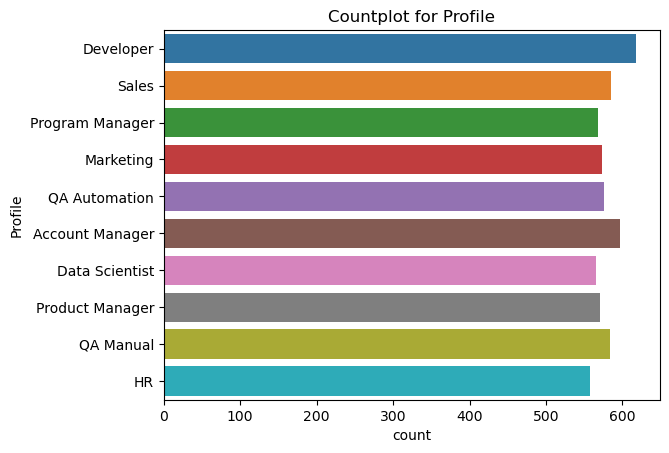

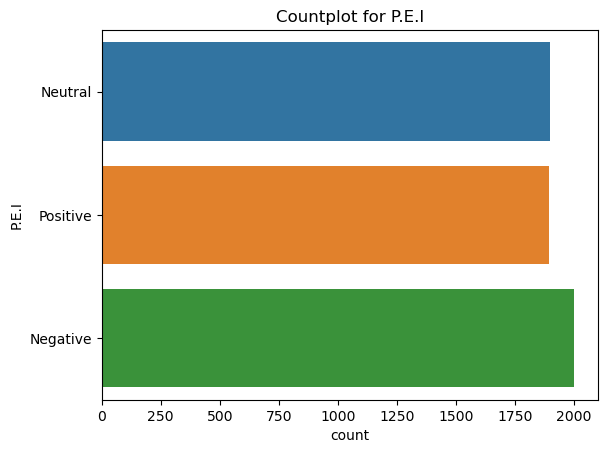

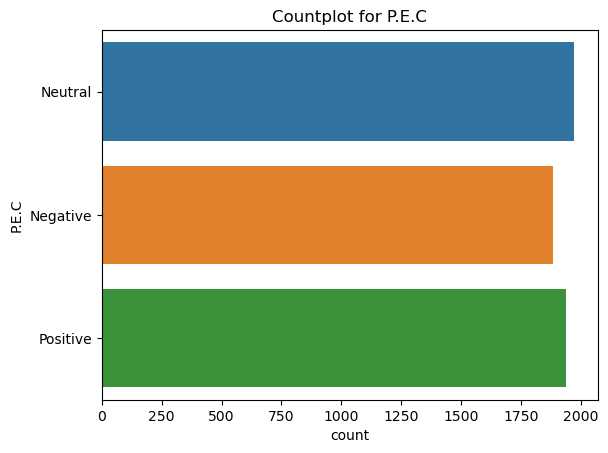

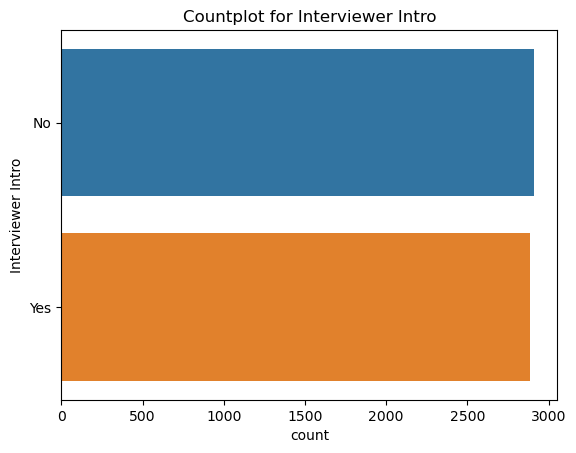

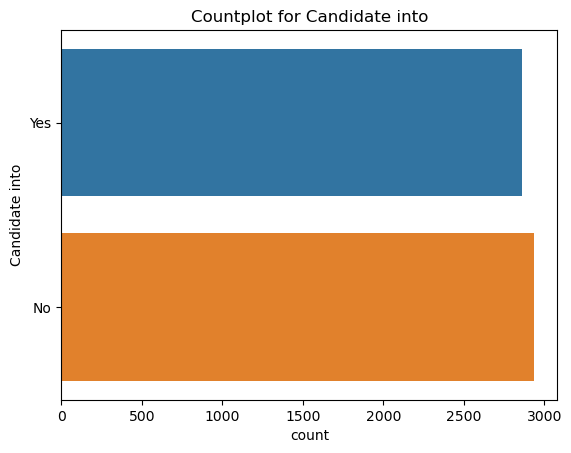

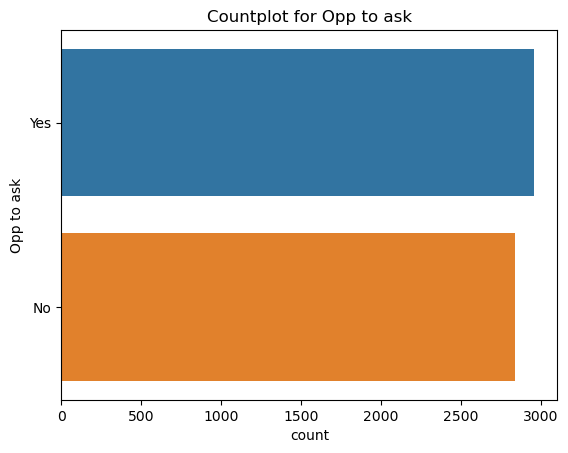

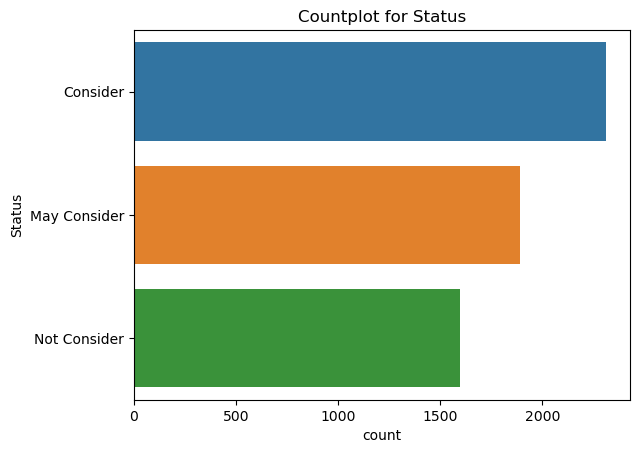

In [180]:
for i in cat_cols:
    sns.countplot(y=train[i])
    plt.title(f'Countplot for {i}')
    plt.show()

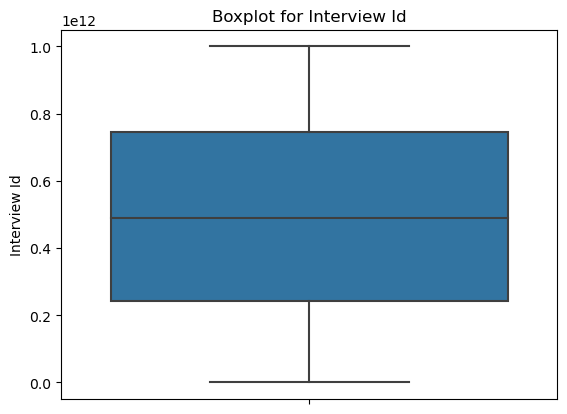

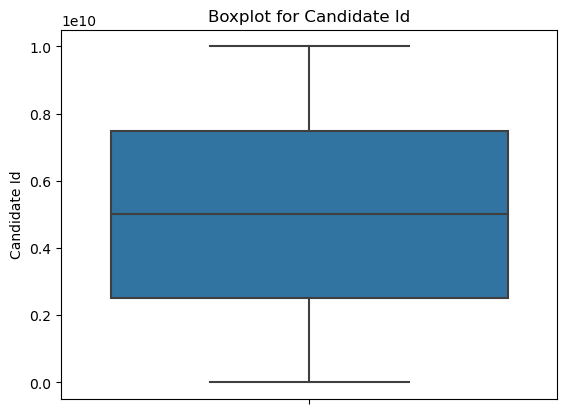

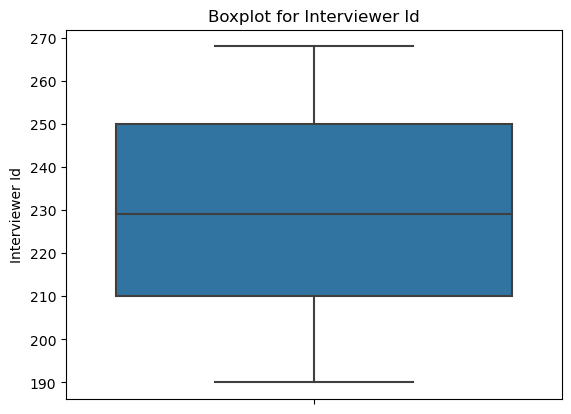

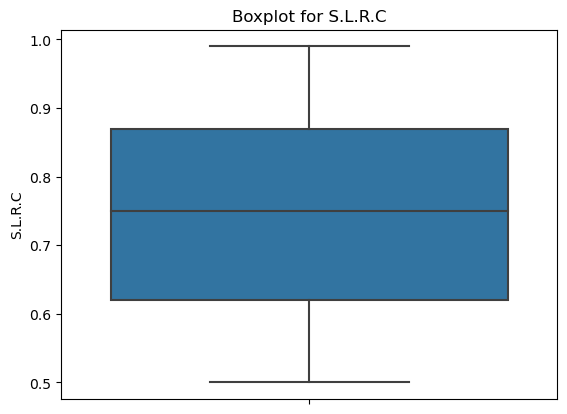

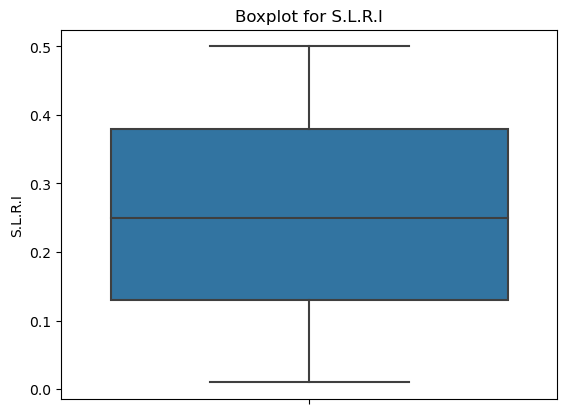

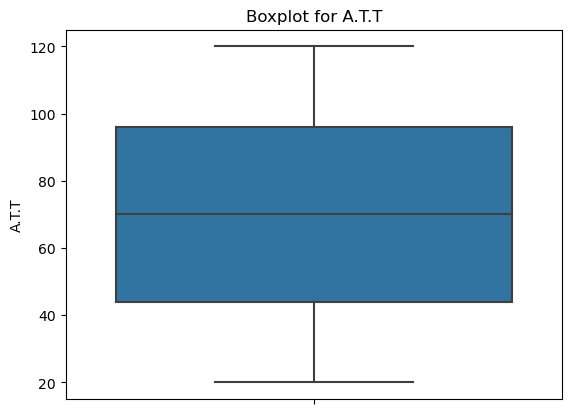

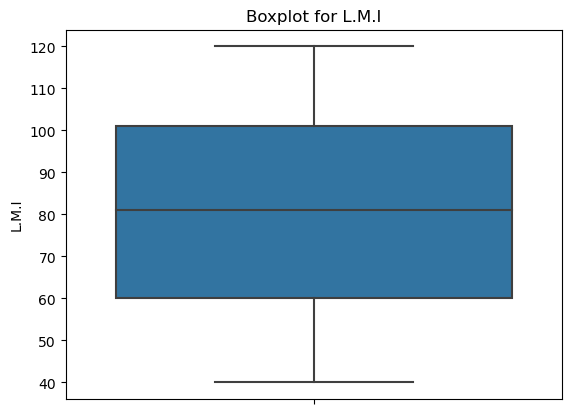

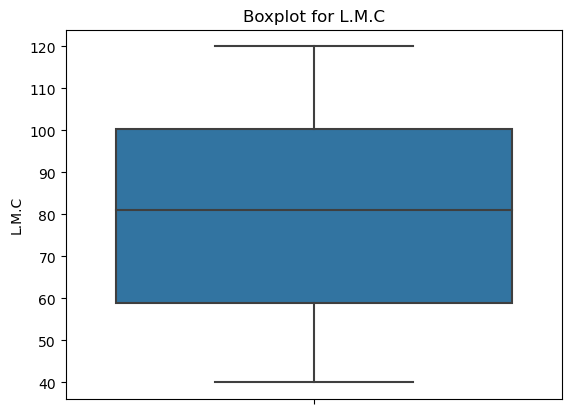

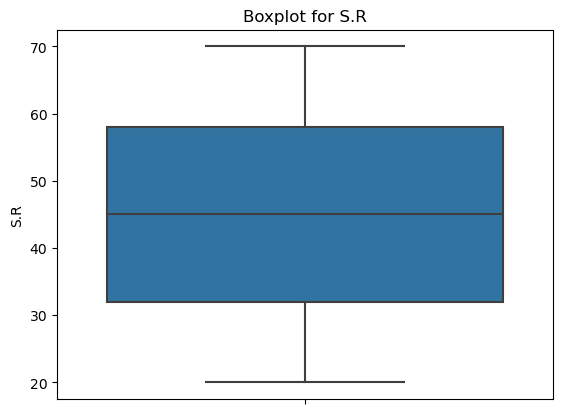

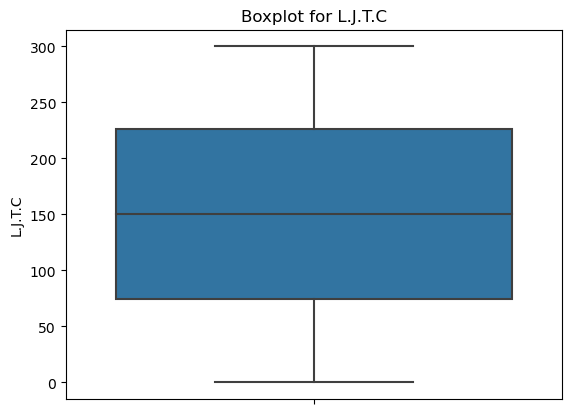

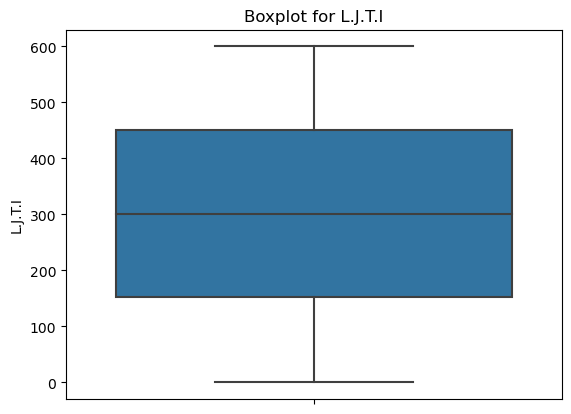

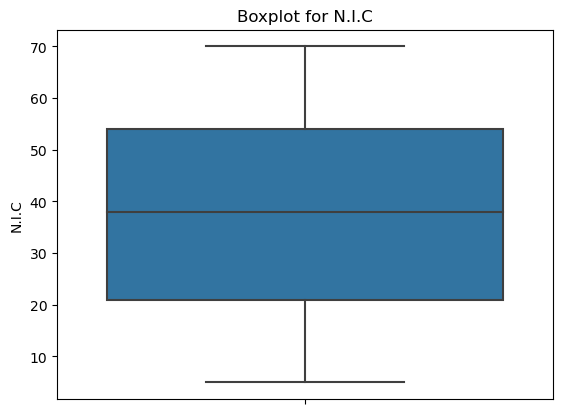

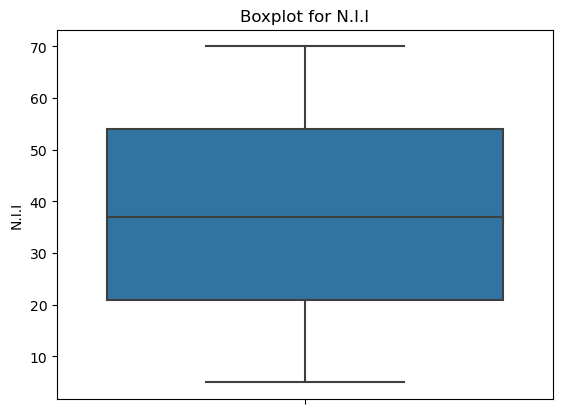

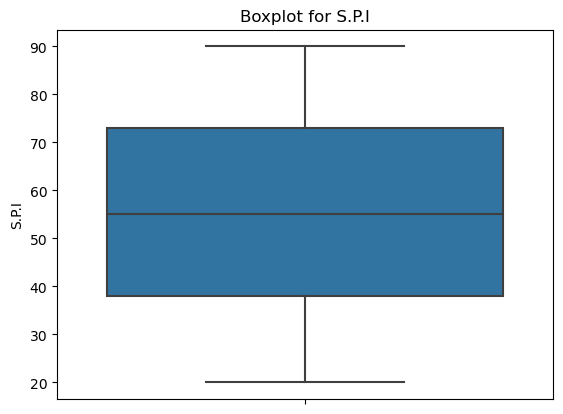

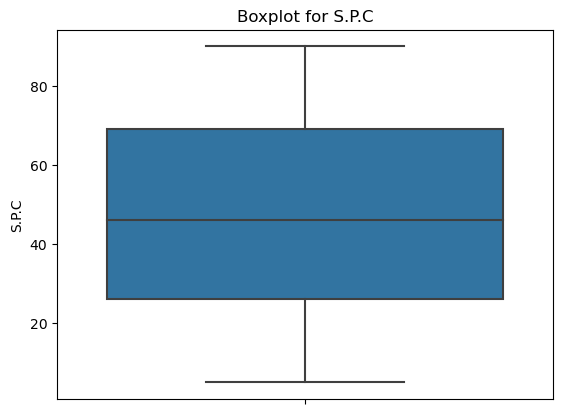

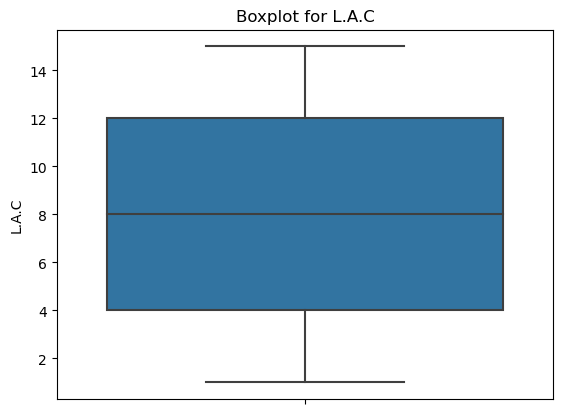

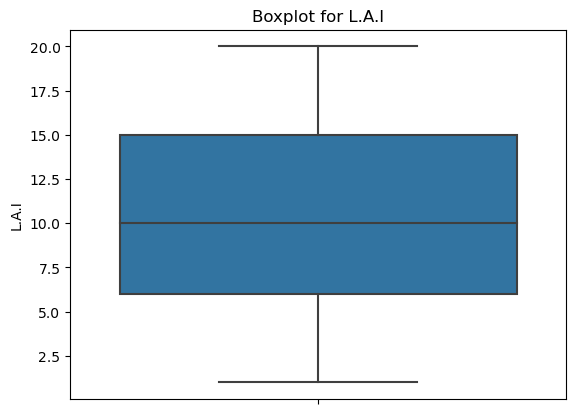

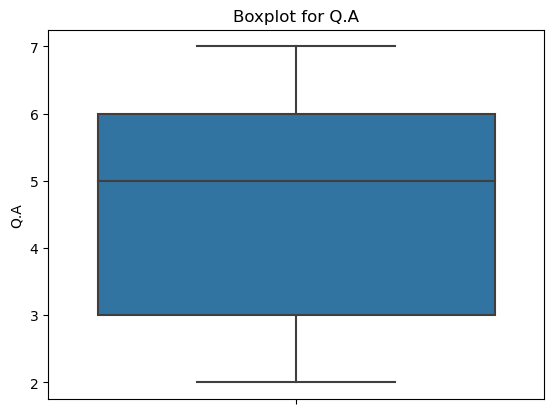

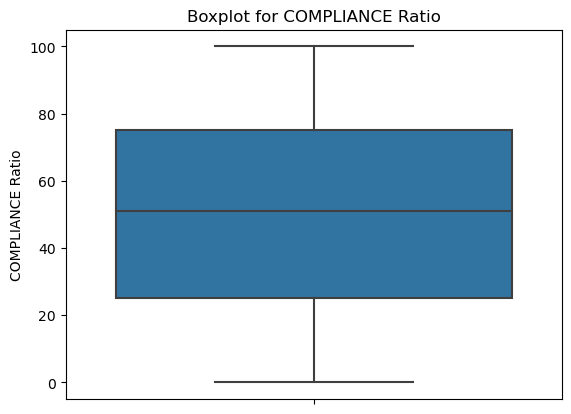

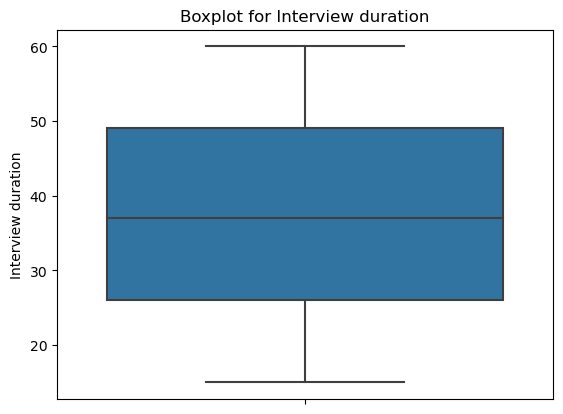

In [183]:
for i in num_cols:
    sns.boxplot(y=train[i])
    plt.title(f'Boxplot for {i}')
    plt.show()

### Inference
1) According to the data there is only minimul number of outliers

### Correlation

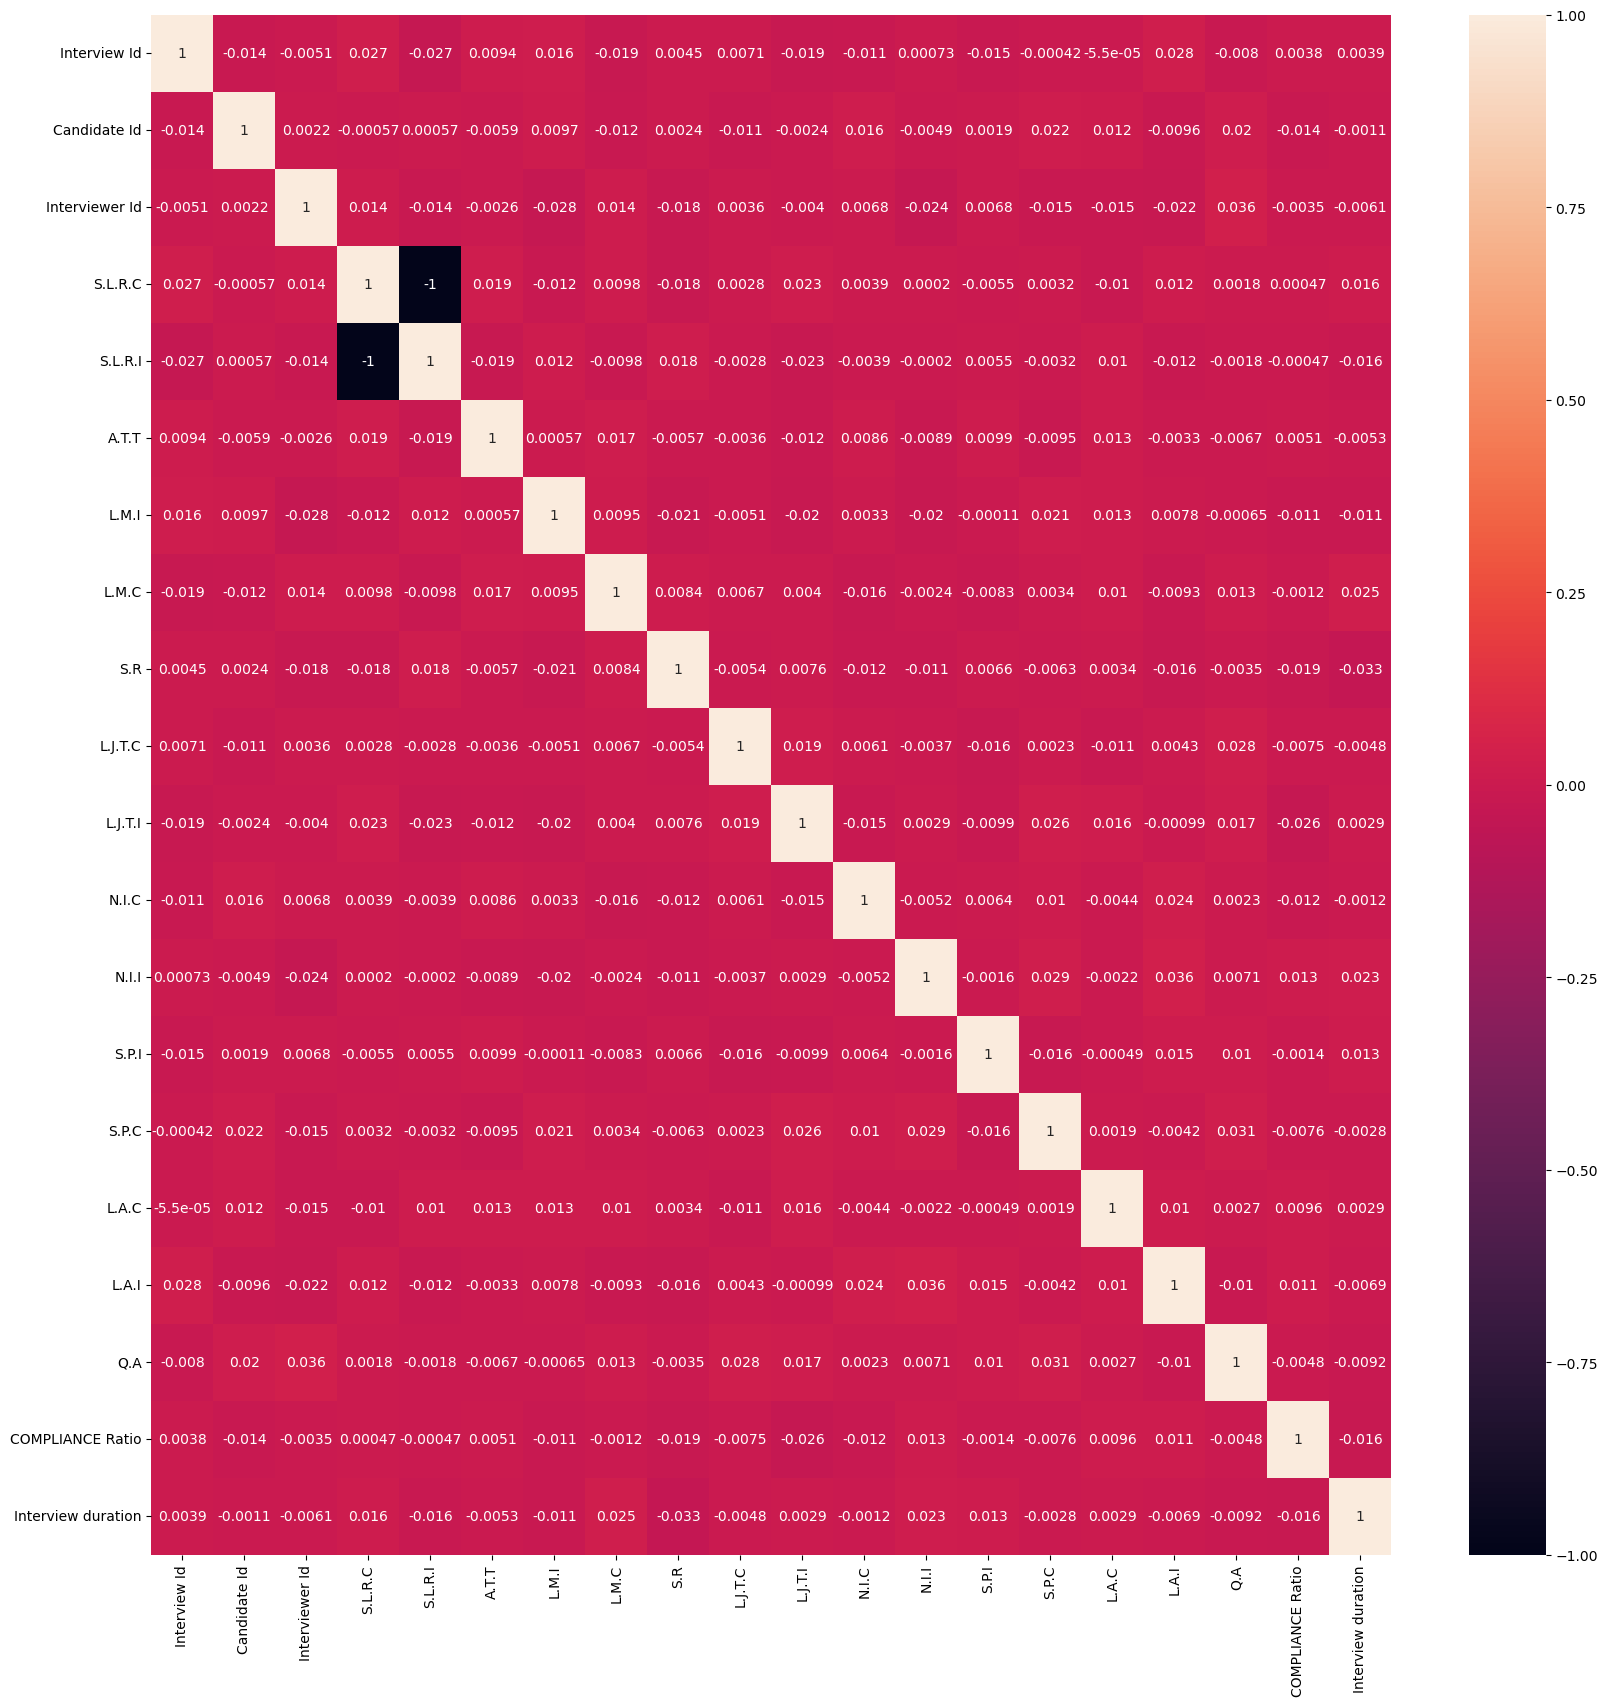

In [184]:
corr = train[num_cols].corr()

plt.figure(figsize=(20,20))
sns.heatmap(corr,annot=True)
plt.show()

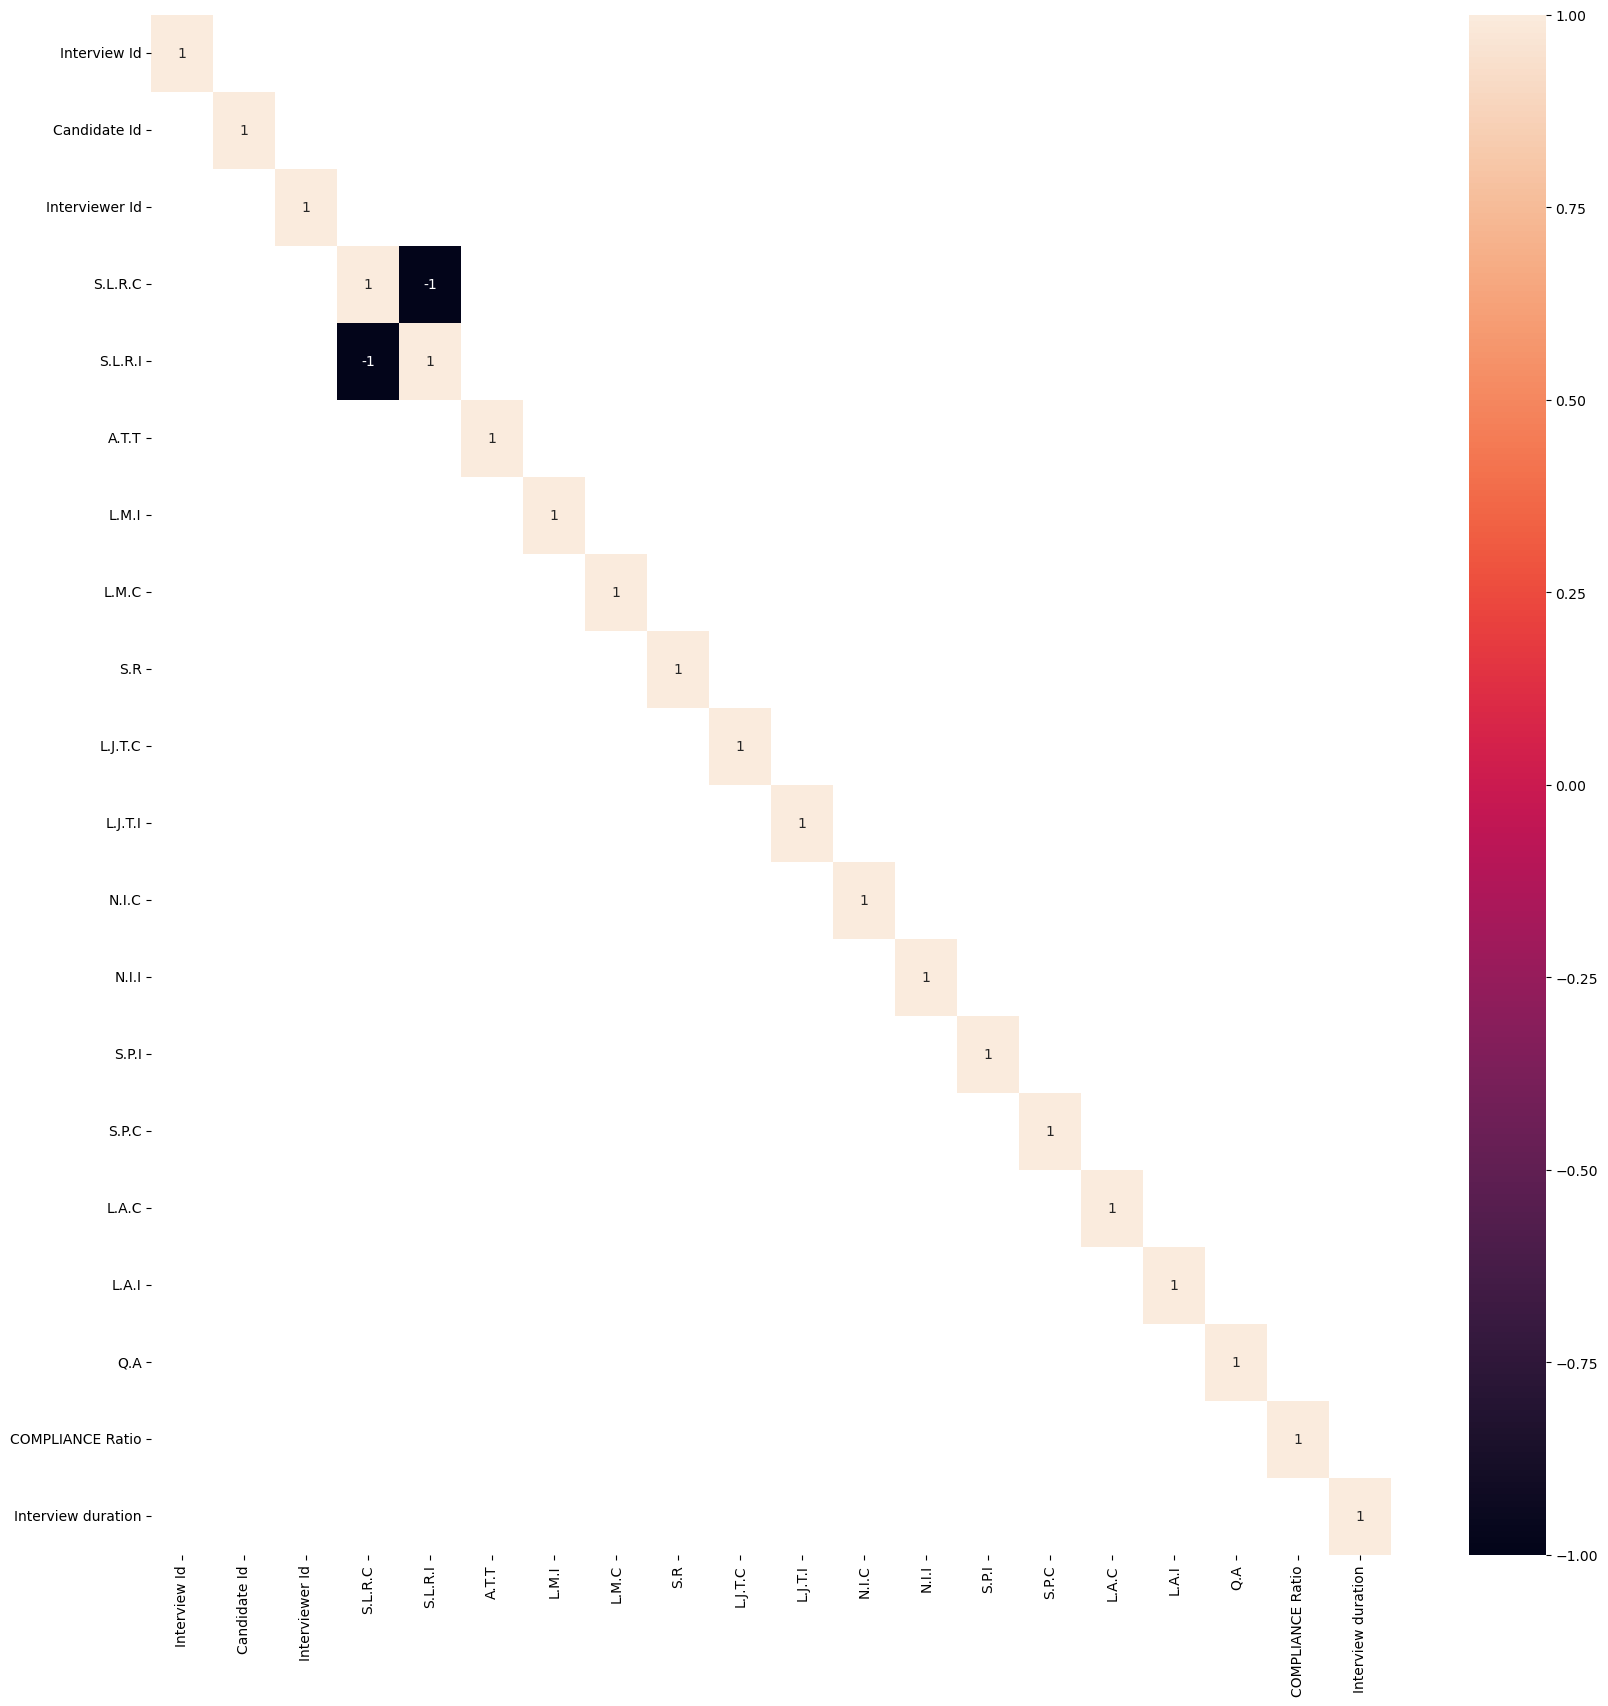

In [185]:
plt.figure(figsize=(20,20))
sns.heatmap(corr[abs(corr)>=0.7],annot=True)
plt.show()

### Inference
1) SLRI and SLRC are highly correlated

In [186]:
train.head()

,Interview Id,Candidate Id,Interviewer Id,Profile,S.L.R.C,S.L.R.I,A.T.T,L.M.I,L.M.C,S.R,...,L.A.I,Q.A,P.E.I,P.E.C,COMPLIANCE Ratio,Interview duration,Interviewer Intro,Candidate into,Opp to ask,Status
0,6.913030e+11,2.655774e+09,194,Developer,0.98,0.02,53,88,93,32,...,15,6,Neutral,Neutral,98,37,No,Yes,Yes,Consider
1,9.214326e+11,7.123846e+08,234,Sales,0.67,0.33,51,53,44,36,...,15,4,Neutral,Negative,54,33,No,No,Yes,Consider
2,4.718839e+10,8.445533e+08,267,Program Manager,0.81,0.19,60,77,75,54,...,7,3,Positive,Positive,31,58,No,Yes,No,Consider
3,9.943741e+11,6.511106e+09,199,Marketing,0.69,0.31,93,42,103,49,...,10,7,Positive,Negative,24,35,No,Yes,No,Consider
4,3.509007e+11,3.487001e+09,221,QA Automation,0.57,0.43,44,44,119,66,...,7,3,Negative,Positive,73,60,Yes,Yes,No,Consider


In [188]:
train.drop(['Interview Id','Candidate Id','Interviewer Id'],axis=1,inplace=True)

In [189]:
train.head()

,Profile,S.L.R.C,S.L.R.I,A.T.T,L.M.I,L.M.C,S.R,L.J.T.C,L.J.T.I,N.I.C,...,L.A.I,Q.A,P.E.I,P.E.C,COMPLIANCE Ratio,Interview duration,Interviewer Intro,Candidate into,Opp to ask,Status
0,Developer,0.98,0.02,53,88,93,32,88,106,41,...,15,6,Neutral,Neutral,98,37,No,Yes,Yes,Consider
1,Sales,0.67,0.33,51,53,44,36,93,313,28,...,15,4,Neutral,Negative,54,33,No,No,Yes,Consider
2,Program Manager,0.81,0.19,60,77,75,54,52,67,26,...,7,3,Positive,Positive,31,58,No,Yes,No,Consider
3,Marketing,0.69,0.31,93,42,103,49,115,166,62,...,10,7,Positive,Negative,24,35,No,Yes,No,Consider
4,QA Automation,0.57,0.43,44,44,119,66,190,394,7,...,7,3,Negative,Positive,73,60,Yes,Yes,No,Consider


In [190]:
train.describe(percentiles=[0.01,0.02,0.03,0.05,0.95,0.96,0.97,0.98,0.99]).T

,count,mean,std,min,1%,2%,3%,5%,50%,95%,96%,97%,98%,99%,max
S.L.R.C,5796.0,0.748326,0.144249,0.50,0.50,0.51,0.51,0.52,0.75,0.97,0.98,0.98,0.98,0.99,0.99
S.L.R.I,5796.0,0.251674,0.144249,0.01,0.01,0.02,0.02,0.03,0.25,0.48,0.48,0.49,0.49,0.50,0.50
A.T.T,5796.0,69.932885,29.463359,20.00,20.00,21.00,22.00,24.00,70.00,116.00,117.00,118.00,119.00,120.00,120.00
L.M.I,5796.0,80.441511,23.451708,40.00,40.00,41.00,42.00,44.00,81.00,116.00,117.00,118.00,119.00,120.00,120.00
L.M.C,5796.0,80.070221,23.540117,40.00,40.00,41.00,42.00,43.00,81.00,117.00,117.00,118.00,119.00,120.00,120.00
S.R,5796.0,45.079883,14.728899,20.00,20.00,21.00,21.00,22.00,45.00,68.00,69.00,69.00,70.00,70.00,70.00
L.J.T.C,5796.0,150.206694,87.252584,0.00,3.00,6.00,8.00,14.00,150.00,285.00,288.00,292.00,295.00,297.00,300.00
L.J.T.I,5796.0,301.026570,172.870010,0.00,5.00,12.00,18.00,31.00,300.00,572.00,577.00,582.00,588.00,594.00,600.00
N.I.C,5796.0,37.713596,19.045935,5.00,5.00,6.00,7.00,8.00,38.00,67.00,68.00,69.00,69.00,70.00,70.00
N.I.I,5796.0,37.377502,19.137530,5.00,5.00,6.00,7.00,8.00,37.00,67.00,68.00,68.00,69.00,70.00,70.00


### Inference
There is a minimul number of outliers so no need to treat them

In [191]:
train.head()

,Profile,S.L.R.C,S.L.R.I,A.T.T,L.M.I,L.M.C,S.R,L.J.T.C,L.J.T.I,N.I.C,...,L.A.I,Q.A,P.E.I,P.E.C,COMPLIANCE Ratio,Interview duration,Interviewer Intro,Candidate into,Opp to ask,Status
0,Developer,0.98,0.02,53,88,93,32,88,106,41,...,15,6,Neutral,Neutral,98,37,No,Yes,Yes,Consider
1,Sales,0.67,0.33,51,53,44,36,93,313,28,...,15,4,Neutral,Negative,54,33,No,No,Yes,Consider
2,Program Manager,0.81,0.19,60,77,75,54,52,67,26,...,7,3,Positive,Positive,31,58,No,Yes,No,Consider
3,Marketing,0.69,0.31,93,42,103,49,115,166,62,...,10,7,Positive,Negative,24,35,No,Yes,No,Consider
4,QA Automation,0.57,0.43,44,44,119,66,190,394,7,...,7,3,Negative,Positive,73,60,Yes,Yes,No,Consider


### Label Encoding

In [196]:
train['Opp to ask'].value_counts()

Yes    2956
No     2840
Name: Opp to ask, dtype: int64

In [197]:
train['Opp to ask'] = train['Opp to ask'].replace('Yes', 1)          # 1 - Yes, No - 0
train['Opp to ask'] = train['Opp to ask'].replace('No', 0)

In [198]:
test['Opp to ask'] = test['Opp to ask'].replace('Yes', 1)          # 1 - Yes, No - 0
test['Opp to ask'] = test['Opp to ask'].replace('No', 0)

In [199]:
train['Candidate into'].value_counts()

No     2935
Yes    2861
Name: Candidate into, dtype: int64

In [200]:
train['Candidate into'] = train['Candidate into'].replace('Yes', 1)          # 1 - Yes, No - 0
train['Candidate into'] = train['Candidate into'].replace('No', 0)

In [201]:
test['Candidate into'] = test['Candidate into'].replace('Yes', 1)          # 1 - Yes, No - 0
test['Candidate into'] = test['Candidate into'].replace('No', 0)

In [202]:
train['Interviewer Intro'].value_counts()

No     2909
Yes    2887
Name: Interviewer Intro, dtype: int64

In [203]:
train['Interviewer Intro'] = train['Interviewer Intro'].replace('Yes', 1)          # 1 - Yes, No - 0
train['Interviewer Intro'] = train['Interviewer Intro'].replace('No', 0)

In [204]:
test['Interviewer Intro'] = test['Interviewer Intro'].replace('Yes', 1)          # 1 - Yes, No - 0
test['Interviewer Intro'] = test['Interviewer Intro'].replace('No', 0)

In [207]:
train['P.E.C'].value_counts()

Neutral     1972
Positive    1939
Negative    1885
Name: P.E.C, dtype: int64

In [208]:
train['P.E.C'] = train['P.E.C'].replace('Neutral', 1)     # Neutral - 1, Negative - 0, Positive - 2      
train['P.E.C'] = train['P.E.C'].replace('Negative', 0)
train['P.E.C'] = train['P.E.C'].replace('Positive', 2)

In [209]:
test['P.E.C'] = test['P.E.C'].replace('Neutral', 1)     # Neutral - 1, Negative - 0, Positive - 2      
test['P.E.C'] = test['P.E.C'].replace('Negative', 0)
test['P.E.C'] = test['P.E.C'].replace('Positive', 2)

In [210]:
train['P.E.I'].value_counts()

Negative    2002
Neutral     1899
Positive    1895
Name: P.E.I, dtype: int64

In [211]:
train['P.E.I'] = train['P.E.I'].replace('Neutral', 1)     # Neutral - 1, Negative - 0, Positive - 2      
train['P.E.I'] = train['P.E.I'].replace('Negative', 0)
train['P.E.I'] = train['P.E.I'].replace('Positive', 2)

In [212]:
test['P.E.I'] = test['P.E.I'].replace('Neutral', 1)     # Neutral - 1, Negative - 0, Positive - 2      
test['P.E.I'] = test['P.E.I'].replace('Negative', 0)
test['P.E.I'] = test['P.E.I'].replace('Positive', 2)

In [215]:
train['Profile'].value_counts()

Developer          618
Account Manager    597
Sales              585
QA Manual          584
QA Automation      576
Marketing          573
Product Manager    571
Program Manager    568
Data Scientist     566
HR                 558
Name: Profile, dtype: int64

In [216]:
train['Profile'] = train['Profile'].replace('Developer', 1)          
train['Profile'] = train['Profile'].replace('Account Manager', 2)
train['Profile'] = train['Profile'].replace('Sales', 3)
train['Profile'] = train['Profile'].replace('QA Manual', 4)           
train['Profile'] = train['Profile'].replace('QA Automation', 5)
train['Profile'] = train['Profile'].replace('Marketing', 6)
train['Profile'] = train['Profile'].replace('Product Manager', 7)          
train['Profile'] = train['Profile'].replace('Program Manager', 8)
train['Profile'] = train['Profile'].replace('Data Scientist', 9)
train['Profile'] = train['Profile'].replace('HR', 10)           

In [217]:
test['Profile'] = test['Profile'].replace('Developer', 1)          
test['Profile'] = test['Profile'].replace('Account Manager', 2)
test['Profile'] = test['Profile'].replace('Sales', 3)
test['Profile'] = test['Profile'].replace('QA Manual', 4)           
test['Profile'] = test['Profile'].replace('QA Automation', 5)
test['Profile'] = test['Profile'].replace('Marketing', 6)
test['Profile'] = test['Profile'].replace('Product Manager', 7)          
test['Profile'] = test['Profile'].replace('Program Manager', 8)
test['Profile'] = test['Profile'].replace('Data Scientist', 9)
test['Profile'] = test['Profile'].replace('HR', 10) 

In [193]:
train['Status'].value_counts()

Consider        2311
May Consider    1890
Not Consider    1595
Name: Status, dtype: int64

In [194]:
train['Status'] = train['Status'].replace('Consider', 1)          # 1 - Consider,2 - May Consider,3 -Not Consider
train['Status'] = train['Status'].replace('May Consider', 2)
train['Status'] = train['Status'].replace('Not Consider', 3)

In [195]:
train['Status'].value_counts()

1    2311
2    1890
3    1595
Name: Status, dtype: int64

### Select x and y

In [222]:
x = train.drop(['Status'],axis=1)
y = train['Status']
print(x.shape)
print(y.shape)

(5796, 23)
(5796,)


In [223]:
x.columns

Index(['Profile', 'S.L.R.C', 'S.L.R.I', 'A.T.T', 'L.M.I', 'L.M.C', 'S.R',
       'L.J.T.C', 'L.J.T.I', 'N.I.C', 'N.I.I', 'S.P.I', 'S.P.C', 'L.A.C',
       'L.A.I', 'Q.A', 'P.E.I', 'P.E.C', 'COMPLIANCE Ratio',
       'Interview duration', 'Interviewer Intro', 'Candidate into',
       'Opp to ask'],
      dtype='object')

In [224]:
from sklearn.model_selection import train_test_split 

In [225]:
x_train,x_test,y_train,y_test = train_test_split(x,y,test_size=0.20,random_state=8)
print(x_train.shape)
print(x_test.shape)
print(y_train.shape)
print(y_test.shape)

(4636, 23)
(1160, 23)
(4636,)
(1160,)


In [226]:
def eval_model(model,x_train,y_train,x_test,y_test,mname):
    model.fit(x_train,y_train)
    ypred = model.predict(x_test)
    train_acc = model.score(x_train,y_train)
    test_acc = model.score(x_test,y_test)
    cm = confusion_matrix(y_test,ypred)
    cr = classification_report(y_test,ypred)
    res_df = pd.DataFrame({'Train_Acc':train_acc,'Test_Acc':test_acc},index=[mname])
    print('Confusion_Matrix\n',cm)
    print('Classification Report\n',cr)
    return res_df

In [227]:
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier, AdaBoostClassifier
from sklearn.metrics import confusion_matrix, classification_report

### Decision Tree Classifier

In [228]:
dt = DecisionTreeClassifier(criterion='gini',max_depth=12,min_samples_split=15)
dt_res = eval_model(dt,x_train,y_train,x_test,y_test,'DTree')
dt_res

Confusion_Matrix
 [[443  30   0]
 [ 45 268  33]
 [  0  34 307]]
Classification Report
               precision    recall  f1-score   support

           1       0.91      0.94      0.92       473
           2       0.81      0.77      0.79       346
           3       0.90      0.90      0.90       341

    accuracy                           0.88      1160
   macro avg       0.87      0.87      0.87      1160
weighted avg       0.88      0.88      0.88      1160



,Train_Acc,Test_Acc
DTree,0.955565,0.877586


### Random Forest Classifier

In [229]:
rf = RandomForestClassifier(n_estimators=80,criterion='gini',max_depth=12,min_samples_split=15)
rf_res = eval_model(rf,x_train,y_train,x_test,y_test,'Random Forest')
rf_res

Confusion_Matrix
 [[442  31   0]
 [ 31 292  23]
 [  0  27 314]]
Classification Report
               precision    recall  f1-score   support

           1       0.93      0.93      0.93       473
           2       0.83      0.84      0.84       346
           3       0.93      0.92      0.93       341

    accuracy                           0.90      1160
   macro avg       0.90      0.90      0.90      1160
weighted avg       0.90      0.90      0.90      1160



,Train_Acc,Test_Acc
Random Forest,0.986842,0.903448


### Adaboost Classifier

In [238]:
ada = AdaBoostClassifier(n_estimators=1000)  # depth of tree = 1
ada_res = eval_model(ada,x_train,y_train,x_test,y_test,'AdaBoost')
ada_res

Confusion_Matrix
 [[462  11   0]
 [  2 336   8]
 [  0  12 329]]
Classification Report
               precision    recall  f1-score   support

           1       1.00      0.98      0.99       473
           2       0.94      0.97      0.95       346
           3       0.98      0.96      0.97       341

    accuracy                           0.97      1160
   macro avg       0.97      0.97      0.97      1160
weighted avg       0.97      0.97      0.97      1160



,Train_Acc,Test_Acc
AdaBoost,0.971527,0.971552


### Gradient Boosting 

In [239]:
from sklearn.ensemble import GradientBoostingClassifier

In [271]:
gbc = GradientBoostingClassifier(n_estimators=200,learning_rate=0.05,
                                 random_state=8,max_features=15)
                                 
gbc_res = eval_model(gbc,x_train,y_train,x_test,y_test,'Gradient Boost')
gbc_res  

Confusion_Matrix
 [[456  17   0]
 [ 14 314  18]
 [  0  20 321]]
Classification Report
               precision    recall  f1-score   support

           1       0.97      0.96      0.97       473
           2       0.89      0.91      0.90       346
           3       0.95      0.94      0.94       341

    accuracy                           0.94      1160
   macro avg       0.94      0.94      0.94      1160
weighted avg       0.94      0.94      0.94      1160



,Train_Acc,Test_Acc
Gradient Boost,0.979724,0.940517


In [272]:
all_res = pd.concat([dt_res,rf_res,ada_res,gbc_res])
all_res

,Train_Acc,Test_Acc
DTree,0.955565,0.877586
Random Forest,0.986842,0.903448
AdaBoost,0.971527,0.971552
Gradient Boost,0.979724,0.940517


### According to the result Adaboost is performing best 

### Final_Model

In [251]:
ada_final = AdaBoostClassifier(n_estimators=1000)  # depth of tree = 1
ada_final.fit(x,y)

AdaBoostClassifier(n_estimators=1000)

In [252]:
test.shape

(1200, 26)

In [253]:
test_data_4_prediction = test[x.columns]
print(test_data_4_prediction.shape)

(1200, 23)


In [255]:
ypred_test = ada_final.predict(test_data_4_prediction)

In [256]:
train.shape

(5796, 24)

In [257]:
test.head()

,Interview Id,Candidate Id,Interviewer Id,Profile,S.L.R.C,S.L.R.I,A.T.T,L.M.I,L.M.C,S.R,...,L.A.C,L.A.I,Q.A,P.E.I,P.E.C,COMPLIANCE Ratio,Interview duration,Interviewer Intro,Candidate into,Opp to ask
0,702127796635,2.381365e+09,229,7,0.52,0.48,103,53,77,30,...,5,19.0,4.0,2,0,24.0,49,1,1,1
1,613490569071,8.428514e+08,194,7,0.87,0.13,54,57,57,68,...,1,9.0,7.0,2,1,99.0,24,0,1,1
2,759998772623,7.681665e+09,266,5,0.60,0.40,50,117,93,36,...,7,15.0,3.0,0,2,16.0,16,1,0,1
3,391760082113,6.627808e+09,256,10,0.52,0.48,102,114,66,31,...,10,4.0,6.0,0,1,66.0,40,0,0,1
4,941599210196,1.148634e+09,267,10,0.59,0.41,96,73,115,23,...,10,4.0,6.0,2,2,47.0,38,0,1,1


In [259]:
submission = pd.DataFrame({'Interview Id':test['Interview Id'],'Status_Id':ypred_test})
submission.head(10)

,Interview Id,Status_Id
0,702127796635,1
1,613490569071,2
2,759998772623,2
3,391760082113,3
4,941599210196,3
5,378921015301,3
6,187779297703,3
7,832859286713,2
8,163655844401,3
9,894723739575,2


In [260]:
Status = {1:'Consider',2:'May Consider',3:'Not Consider'}

In [264]:
submission['Status'] = submission['Status_Id'].map(Status)

In [265]:
submission.head()

,Interview Id,Status_Id,Status
0,702127796635,1,Consider
1,613490569071,2,May Consider
2,759998772623,2,May Consider
3,391760082113,3,Not Consider
4,941599210196,3,Not Consider


In [266]:
submission.drop(['Status_Id'],axis=1,inplace=True)

In [267]:
submission.to_csv('result.csv',index=False)